# Homework 3 - Simple Momentum Strategy

1. Download daily price data for QQQ, TLT, GLD, RWO from yahoo finance since 2016-01-01. Using the adjusted close price data, compute daily returns. This should be a DataFrame with index=date, columns=ticker and values=daily returns.

In [39]:
import yfinance as yf
data = yf.download(['QQQ', 'TLT', 'GLD', 'RWO'], start="2016-01-01")
                                    

[*********************100%%**********************]  4 of 4 completed


In [41]:
adj_close = data['Adj Close']
prev_returns = adj_close.shift(1)
# print(adj_close)
# print(prev_returns)
returns = (adj_close/prev_returns -1 )
print(returns)

Ticker           GLD       QQQ       RWO       TLT
Date                                              
2016-01-04       NaN       NaN       NaN       NaN
2016-01-05  0.002819 -0.001735  0.012116 -0.004035
2016-01-06  0.014441 -0.009606 -0.007695  0.013476
2016-01-07  0.014140 -0.031313 -0.017881  0.001794
2016-01-08 -0.004428 -0.008201 -0.015135  0.004478
...              ...       ...       ...       ...
2024-07-30  0.009985 -0.013731  0.005483  0.003851
2024-07-31  0.018111  0.029594 -0.002499  0.010229
2024-08-01 -0.003443 -0.024221  0.004784  0.008625
2024-08-02 -0.001905 -0.023735  0.000680  0.031161
2024-08-05 -0.012692 -0.029816 -0.024014  0.005291

[2161 rows x 4 columns]


2. Compute the signal. Complete the compute_momentum function which computes a simple momentum signal. The function takes in a DataFrame with index = date, columns=ticker and values containing daily returns. It returns a new DataFrame with index = date, columns=ticker and values containing the momentum signal for the ticker on that day. The momentum signal for each ticker is defined as the annualized sharpe ratio of the past 252 days.

In [45]:
import math
def compute_momentum(ret):
    # fill out the body here
    # return a DataFrame "momentum" containing a simple momentum indicator 
    mean = ret.rolling(252).mean()
    std = ret.rolling(252).std()
    momentum = (mean/std)*math.sqrt(252)
    
    return momentum
momentum = compute_momentum(returns)

3. Create a portfolio. Complete the function compute_portfolio. This function takes as input the DataFrame "momentum" from above. It returns a new DataFrame "portfolio" which has the same index/columns and has as values portfolio weights. The weights are computed as follows. On each date, equal-weight long the tickers with a momentum signal above 1.

In [46]:
def compute_portfolio(momentum):
    # fill out the body here
    # return a DataFrame "portfolio" containing portfolio weights
    def signal(x):
        if(x > 1):
            return 1
        else:
            return 0
    signals = momentum.map(signal)
    print(signals)
    print(signals.sum(axis = 1))
    portfolio = signals.div(signals.sum(axis = 1), axis = 0)
    return portfolio
portfolio = compute_portfolio(momentum)

Ticker      GLD  QQQ  RWO  TLT
Date                          
2016-01-04    0    0    0    0
2016-01-05    0    0    0    0
2016-01-06    0    0    0    0
2016-01-07    0    0    0    0
2016-01-08    0    0    0    0
...         ...  ...  ...  ...
2024-07-30    1    1    0    0
2024-07-31    1    1    0    0
2024-08-01    1    1    0    0
2024-08-02    1    1    0    0
2024-08-05    1    1    0    0

[2161 rows x 4 columns]
Date
2016-01-04    0
2016-01-05    0
2016-01-06    0
2016-01-07    0
2016-01-08    0
             ..
2024-07-30    2
2024-07-31    2
2024-08-01    2
2024-08-02    2
2024-08-05    2
Length: 2161, dtype: int64


4. Portfolio returns. Using the "portfolio" returned in part(3) and the returns generated in part(1), compute the returns to the simple momentum strategy. 
- What is the annualized sharpe ratio of the strategy? 
- How about the annualized sharpe ratio within each year? 
- How correlated is the strategy with the underlying tickers?
- Plot the cumulative sum of the returns through time

Date
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
                ...   
2024-07-30    2.671806
2024-07-31    2.813044
2024-08-01    2.685252
2024-08-02    2.569637
2024-08-05    2.368838
Length: 2161, dtype: float64
Ticker           GLD       QQQ       RWO       TLT      port
Date                                                        
2016-01-04       NaN       NaN       NaN       NaN  0.000000
2016-01-05  0.002819 -0.001735  0.012116 -0.004035  0.000000
2016-01-06  0.014441 -0.009606 -0.007695  0.013476  0.000000
2016-01-07  0.014140 -0.031313 -0.017881  0.001794  0.000000
2016-01-08 -0.004428 -0.008201 -0.015135  0.004478  0.000000
...              ...       ...       ...       ...       ...
2024-07-30  0.009985 -0.013731  0.005483  0.003851 -0.001873
2024-07-31  0.018111  0.029594 -0.002499  0.010229  0.023852
2024-08-01 -0.003443 -0.024221  0.004784  0.008625 -0.013832
2024-08-02 -0.001905 -0.023735  0.000680  

<Axes: xlabel='Date'>

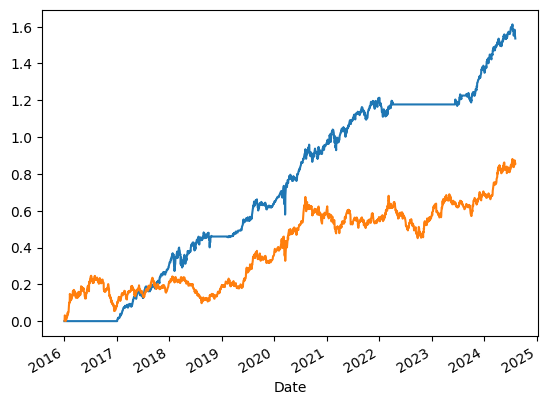

In [68]:
portfolio_returns = portfolio.mul(returns).sum(axis = 1)
momentum = compute_momentum(portfolio_returns)
print(momentum)
returns['port'] = portfolio_returns
print(returns)
returns.corr()
portfolio_returns.cumsum().plot()